In [1]:
import pandas as pd

In [2]:
from datetime import datetime
from datetime import date
import numpy as np
import math

In [3]:
from matplotlib import pyplot as plt

In [72]:
plt.rcParams["figure.figsize"] = (5,3)

In [4]:
file = "C:/Users/Ishwarya Sriram/Downloads/KPMG_VI_New_raw_data_update_final.xlsx"

# DEMOGRAPHICS SHEET

In [5]:
sheet2 = pd.read_excel(file, 
                        sheet_name = 3, index_col=0,
                        skiprows=1)
sheet2.head()
# //demographics

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [6]:
sheet2=sheet2.drop('default',axis=1)

In [7]:
sheet2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
customer_id,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [8]:
def gender_repl(data):
    if data=='Femal' or data=='F':
        data='Female'
    elif data == 'M':
        data = 'Male'
    elif data == 'U':
        data = 'Unspecified'
    return data
col=sheet2.apply(lambda row: gender_repl(row['gender']),
         axis=1)
sheet2['gender']=col


In [9]:
sheet2.isnull().sum()

first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [10]:
sheet2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           4000 non-null   object        
 1   last_name                            3875 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   job_title                            3494 non-null   object        
 6   job_industry_category                3344 non-null   object        
 7   wealth_segment                       4000 non-null   object        
 8   deceased_indicator                   4000 non-null   object        
 9   owns_car                             4000 non-null   object        
 10  tenure      

In [11]:
# sheet1.columns

In [12]:
sheet2=sheet2.dropna()
sheet2.drop(['first_name', 'last_name','job_title'],axis=1,inplace=True)
sheet2 = sheet2[sheet2['DOB'] != sheet2.DOB.min()]
sheet2['age'] = (datetime.now() - sheet2['DOB']) / np.timedelta64(1, 'Y')
sheet2['age'] = sheet2['age'].astype('int64')
sheet2 = sheet2[sheet2['deceased_indicator']=='N']
sheet2.drop(['DOB'],axis=1,inplace=True)
sheet2.head()



,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
customer_id,,,,,,,,
1,Female,93,Health,Mass Customer,N,Yes,11.0,67
2,Male,81,Financial Services,Mass Customer,N,Yes,16.0,40
3,Male,61,Property,Mass Customer,N,Yes,15.0,67
9,Female,97,Argiculture,Affluent Customer,N,Yes,8.0,48
10,Female,49,Financial Services,Mass Customer,N,Yes,20.0,32


In [13]:
sheet2.job_industry_category.value_counts()

Manufacturing         670
Financial Services    661
Health                528
Retail                296
Property              229
IT                    123
Entertainment         116
Argiculture            97
Telecommunications     57
Name: job_industry_category, dtype: int64

In [14]:
sheet2.wealth_segment.value_counts()

Mass Customer        1383
High Net Worth        710
Affluent Customer     684
Name: wealth_segment, dtype: int64

In [15]:
bins= [13,20,30,45,50,60,100]
labels = ['Teen','20s','30s','Early 40s','Mid-Life','Senior Citizens']
sheet2['AgeGroup'] = pd.cut(sheet2['age'], bins=bins, labels=labels, right=False)
sheet2.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,AgeGroup
customer_id,,,,,,,,,
1,Female,93,Health,Mass Customer,N,Yes,11.0,67,Senior Citizens
2,Male,81,Financial Services,Mass Customer,N,Yes,16.0,40,30s
3,Male,61,Property,Mass Customer,N,Yes,15.0,67,Senior Citizens
9,Female,97,Argiculture,Affluent Customer,N,Yes,8.0,48,Early 40s
10,Female,49,Financial Services,Mass Customer,N,Yes,20.0,32,30s


In [66]:
matplotlib.style.use('ggplot') 

Text(0.5, 0, 'Age Groups')

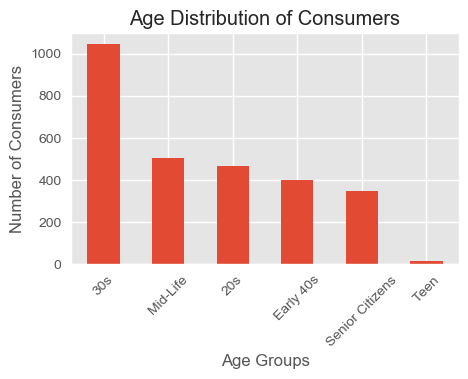

In [218]:
sheet2.AgeGroup.value_counts().plot(kind="bar",rot=45)
plt.title("Age Distribution of Consumers")
plt.ylabel("Number of Consumers")
plt.xlabel("Age Groups")


In [36]:
sheet2['AgeGroup'].value_counts()

30s                1045
Mid-Life            505
20s                 466
Early 40s           397
Senior Citizens     349
Teen                 15
Name: AgeGroup, dtype: int64

Text(0.5, 0, 'Purchase of consumers')

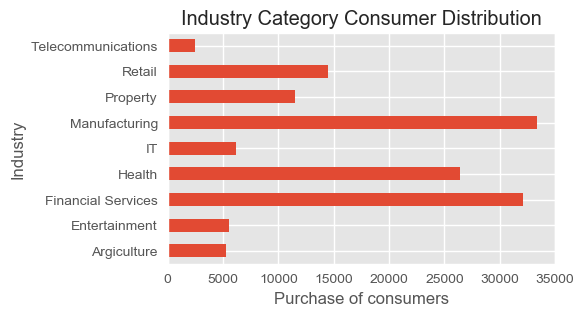

In [219]:
sheet2.groupby('job_industry_category').agg({'past_3_years_bike_related_purchases':'sum'}).plot(kind="barh").legend().remove()
plt.title("Industry Category Consumer Distribution")
plt.ylabel("Industry")
plt.xlabel("Purchase of consumers")

Text(0.5, 0, 'Number of consumers')

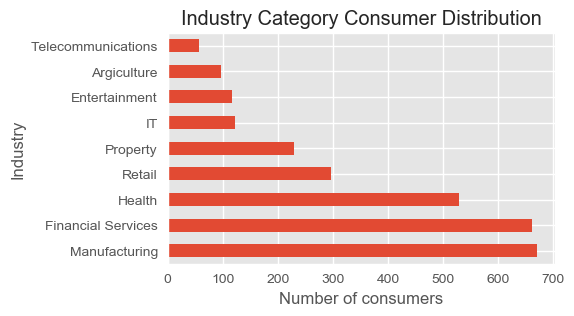

In [75]:
sheet2.job_industry_category.value_counts().plot(kind="barh")
plt.title("Industry Category Consumer Distribution")
plt.ylabel("Industry")
plt.xlabel("Number of consumers")

Text(0.5, 1.0, 'Gender Distribution')

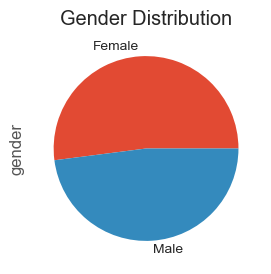

In [76]:
sheet2.gender.value_counts().plot(kind="pie")
plt.title("Gender Distribution")
# plt.ylabel("Industry")
# plt.xlabel("Number of consumers")

In [134]:
https://www.kaggle.com/sudiptog81/kpmg-virtual-internship-module-2

SyntaxError: invalid syntax (<ipython-input-134-ba7f8eed119b>, line 1)

# Transactions Sheet

In [41]:
sheet1 = pd.read_excel(file, 
                        sheet_name = 1, index_col=0,
                        skiprows=1)
sheet1.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [46]:
sheet1=sheet1.dropna()

In [47]:
sheet1.reset_index(inplace = True)

In [48]:
sheet1.sort_values('customer_id',inplace = True)

In [49]:
sheet1.head()

,index,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,93,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
10,3689,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
9,13273,13644,25,1,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0
7,9526,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
6,14517,14931,31,1,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,37337.0


In [50]:
sheet1['order_status'].value_counts()

Approved     19273
Cancelled      172
Name: order_status, dtype: int64

In [51]:
sheet1['profit']=sheet1['list_price']-sheet1['standard_cost']


In [52]:
print(sheet1.transaction_date.max(),sheet1.transaction_date.min())
import datetime as dt

2017-12-30 00:00:00 2017-01-01 00:00:00


In [53]:
sd=dt.datetime(2017,12,30)
sheet1['hist'] = sd-sheet1['transaction_date']
sheet1['hist'].astype('timedelta64[D]')
sheet1['hist']=sheet1['hist'] / np.timedelta64(1, 'D')
sheet1.head()

,index,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,hist
0,93,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,110.56,7.0
10,3689,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,751.02,268.0
9,13273,13644,25,1,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0,709.34,225.0
7,9526,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,90.10,359.0
6,14517,14931,31,1,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,37337.0,57.73,16.0


Text(0, 0.5, 'Number of Purchases')

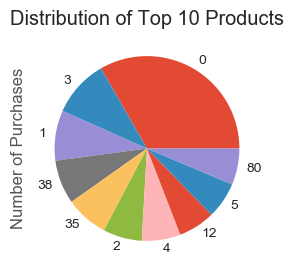

In [124]:
#profit vs online order
prod = sheet1.groupby('product_id').agg({'customer_id':'count'})
prod.sort_values('customer_id',inplace=True,ascending=False)
prod.head(10).plot(y='customer_id', use_index=True,kind='pie',legend=False)
prod.head()
# plt.legend(loc="upper right",labels=['1','2','3','4','5'])
plt.title('Distribution of Top 10 Products')
plt.ylabel('Number of Purchases')

Text(0, 0.5, 'Profits')

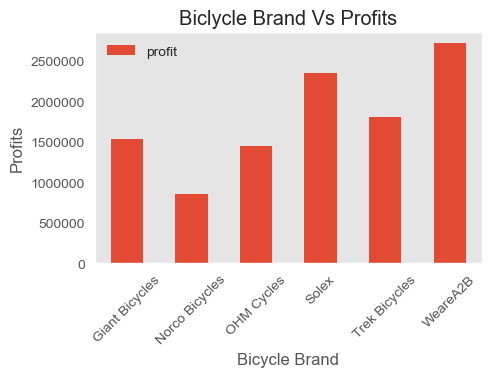

In [97]:
sheet1.groupby('brand').agg({'profit':'sum'}).plot(kind="bar",title='Biclycle Brand Vs Profits',rot=45,grid=False )
plt.xlabel('Bicycle Brand')
plt.ylabel('Profits')

In [125]:
sheet2.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,AgeGroup
customer_id,,,,,,,,,
1,Female,93,Health,Mass Customer,N,Yes,11.0,67,Senior Citizens
2,Male,81,Financial Services,Mass Customer,N,Yes,16.0,40,30s
3,Male,61,Property,Mass Customer,N,Yes,15.0,67,Senior Citizens
9,Female,97,Argiculture,Affluent Customer,N,Yes,8.0,48,Early 40s
10,Female,49,Financial Services,Mass Customer,N,Yes,20.0,32,30s


Text(0.5, 1.0, 'Past 3 years purchases distribution by Gender')

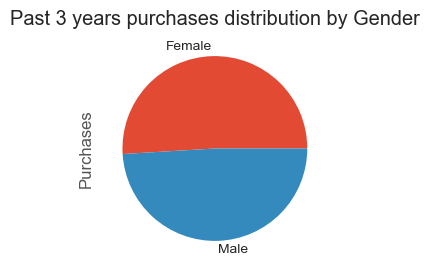

In [223]:
t=sheet2.groupby('gender').agg({'past_3_years_bike_related_purchases':'sum'})
t.plot(kind='pie',y='past_3_years_bike_related_purchases',use_index=True,legend=False)
plt.ylabel('Purchases')
plt.title('Past 3 years purchases distribution by Gender')

Text(0.5, 1.0, 'Past 3 years bike related purchases distribution by Wealth Segment')

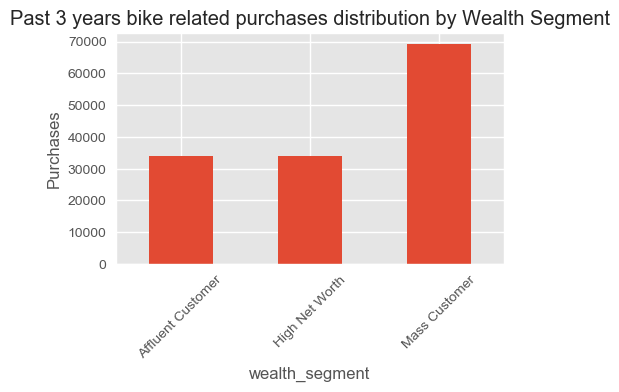

In [140]:
t=sheet2.groupby('wealth_segment').agg({'past_3_years_bike_related_purchases':'sum'})
t.plot(kind='bar',y='past_3_years_bike_related_purchases',use_index=True,legend=False,rot=45)
plt.ylabel('Purchases')
plt.title('Past 3 years bike related purchases distribution by Wealth Segment')

Text(0.5, 1.0, 'Profits by Wealth Segment')

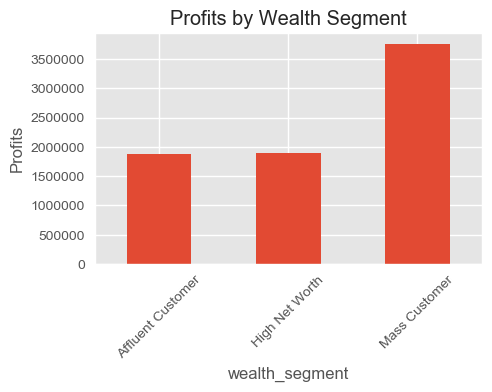

In [142]:
t=df.groupby('wealth_segment').agg({'profit':'sum'})
t.plot(kind='bar',y='profit',use_index=True,legend=False,rot=45)
plt.ylabel('Profits')
plt.title('Profits by Wealth Segment')

In [228]:
df = pd.merge(sheet1,sheet2, left_on='customer_id',right_on='customer_id')
df.set_index('customer_id')

,index,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,hist,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,AgeGroup
customer_id,,,,,,,,,,,,,,,,,,,,,
1,93,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,...,7.0,Female,93,Health,Mass Customer,N,Yes,11.0,67,Senior Citizens
1,3689,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,...,268.0,Female,93,Health,Mass Customer,N,Yes,11.0,67,Senior Citizens
1,13273,13644,25,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,medium,...,225.0,Female,93,Health,Mass Customer,N,Yes,11.0,67,Senior Citizens
1,9526,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,359.0,Female,93,Health,Mass Customer,N,Yes,11.0,67,Senior Citizens
1,14517,14931,31,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,...,16.0,Female,93,Health,Mass Customer,N,Yes,11.0,67,Senior Citizens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,3405,3479,73,2017-04-18,1.0,Approved,Solex,Standard,medium,medium,...,256.0,Male,99,Manufacturing,Mass Customer,N,Yes,19.0,35,30s
3496,9511,9769,5,2017-03-07,0.0,Approved,Trek Bicycles,Mountain,low,medium,...,298.0,Male,99,Manufacturing,Mass Customer,N,Yes,19.0,35,30s
3497,8059,8276,18,2017-09-01,1.0,Approved,Solex,Standard,medium,medium,...,120.0,Female,73,Manufacturing,Affluent Customer,N,Yes,18.0,35,30s


In [167]:
df1 = df[df['gender']=='Male']
df2 = df[df['gender']=='Female']
df3 = df[df['gender']=='Unknown']

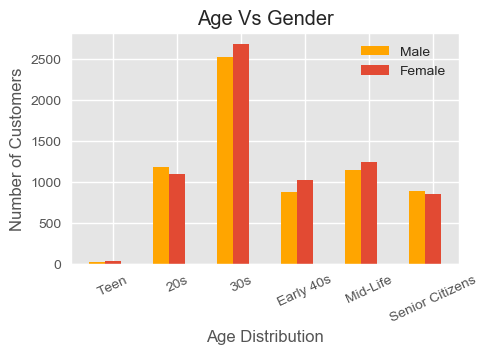

In [170]:
N = 2
ind = np.arange(len(labels))
width = 0.25

xvals = df1.groupby('AgeGroup').agg({'customer_id':'count'})['customer_id'].to_list()
bar1 = plt.bar(ind, xvals, width, color = 'orange')

yvals = df2.groupby('AgeGroup').agg({'customer_id':'count'})['customer_id'].to_list()
bar2 = plt.bar(ind+width, yvals, width)

plt.xlabel("Age Distribution")
plt.ylabel('Number of Customers')
plt.title("Age Vs Gender")

plt.xticks(ind+width,labels,rotation=25)
plt.legend( (bar1, bar2), ('Male', 'Female') )
plt.show()


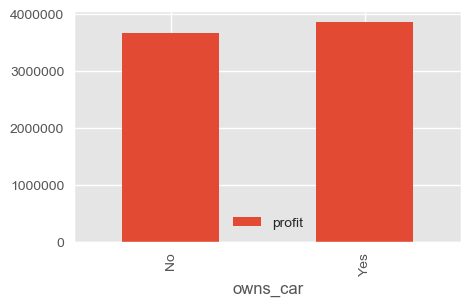

In [175]:
df.groupby('owns_car').agg({'profit': 'sum'}).plot(kind='bar')

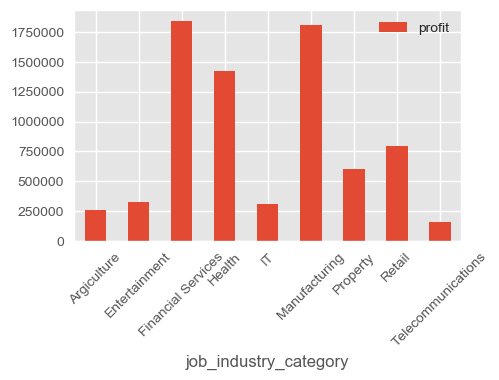

In [182]:
df.groupby('job_industry_category').agg({'profit': 'sum'}).plot(kind='bar',rot=45)


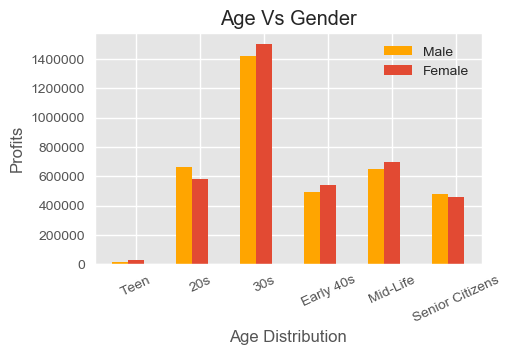

In [173]:
N = 2
ind = np.arange(len(labels))
width = 0.25

xvals = df1.groupby('AgeGroup').agg({'profit':'sum'})['profit'].to_list()
bar1 = plt.bar(ind, xvals, width, color = 'orange')

yvals = df2.groupby('AgeGroup').agg({'profit':'sum'})['profit'].to_list()
bar2 = plt.bar(ind+width, yvals, width)

plt.xlabel("Age Distribution")
plt.ylabel('Profits')
plt.title("Age Vs Gender")

plt.xticks(ind+width,labels,rotation=25)
plt.legend( (bar1, bar2), ('Male', 'Female') )
plt.show()


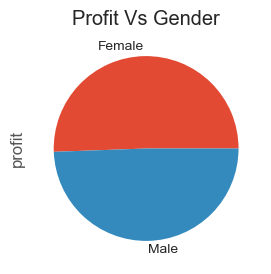

In [222]:
df.groupby('gender').agg({'profit':'sum'})['profit'].plot(kind='pie',title='Profit Vs Gender')

In [183]:
rfm = sheet1.groupby('customer_id').agg(
        {
            'hist': lambda x: x.min(),
            'customer_id': lambda x: len(x),
            'profit': lambda x: x.sum()
        })
rfm.rename(columns={
    'hist':'recency',
    'customer_id':'frequency',
    'profit': 'monetary_value'
},inplace = True)
rfm.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [60]:
https://www.kaggle.com/regivm/rfm-analysis-tutorial

SyntaxError: invalid syntax (<ipython-input-60-41d5069b7467>, line 1)

In [184]:
quart = rfm.quantile(q=[0.25,0.50,0.75])
quart

,recency,frequency,monetary_value
0.25,18.0,4.0,1797.43
0.50,45.0,5.0,2798.99
0.75,88.0,7.0,4122.44


In [185]:
quart=quart.to_dict()
quart

{'recency': {0.25: 18.0, 0.5: 45.0, 0.75: 88.0},
 'frequency': {0.25: 4.0, 0.5: 5.0, 0.75: 7.0},
 'monetary_value': {0.25: 1797.4299999999998,
  0.5: 2798.9900000000002,
  0.75: 4122.4400000000005}}

In [186]:
def ROneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 4
    
def FMOneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 1


In [187]:
rfmSeg = rfm
rfmSeg['r_score'] = rfmSeg['recency'].apply(ROneHotEncoder, args=('recency', quart))
rfmSeg['f_score'] = rfmSeg['frequency'].apply(FMOneHotEncoder, args=('frequency', quart))
rfmSeg['m_score'] = rfmSeg['monetary_value'].apply(FMOneHotEncoder, args=('monetary_value', quart))
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1,7.0,11,3018.09,1,1,3
2,128.0,3,2226.26,4,4,2
3,102.0,7,3290.21,4,3,3
4,195.0,2,220.57,4,4,4
5,16.0,6,2394.94,1,3,2


In [188]:
rfmSeg['rfm_class'] = 100 * rfmSeg['r_score'] + 10 * rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg['total_score'] = rfmSeg['r_score'] + rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5
2,128.0,3,2226.26,4,4,2,442,10
3,102.0,7,3290.21,4,3,3,433,10
4,195.0,2,220.57,4,4,4,444,12
5,16.0,6,2394.94,1,3,2,132,6


In [190]:
rfm_quartiles = (rfmSeg['rfm_class'].min(), rfmSeg['rfm_class'].quantile(q=0.25),
                 rfmSeg['rfm_class'].median(), rfmSeg['rfm_class'].quantile(q=0.75), 
                 rfmSeg['rfm_class'].max())
rfm_quartiles

(111, 144.0, 244.0, 344.0, 444)

In [191]:
def RFMClassOneHotEncoder(x, p, d):
    if x <= d[0]:
        return 'gold'
    elif x <= d[1]:
        return 'silver'
    elif x <= d[2]: 
        return 'bronze'
    else: 
        return 'basic'

rfmSeg['customer_title'] = rfmSeg['rfm_class'].apply(RFMClassOneHotEncoder, args=('rfm_class', rfm_quartiles))
rfmSeg

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title
customer_id,,,,,,,,,
1,7.0,11,3018.090000,1,1,3,113,5,silver
2,128.0,3,2226.260000,4,4,2,442,10,basic
3,102.0,7,3290.210000,4,3,3,433,10,basic
4,195.0,2,220.570000,4,4,4,444,12,basic
5,16.0,6,2394.940000,1,3,2,132,6,silver
...,...,...,...,...,...,...,...,...,...
3497,52.0,3,1648.320000,3,4,4,344,11,basic
3498,127.0,6,3147.330000,4,3,3,433,10,basic
3499,51.0,7,4955.250000,3,3,1,331,7,basic


# Address Sheet

In [205]:
sheet3 = pd.read_excel(file, 
                        sheet_name = 4, index_col=0,
                        skiprows=1)
sheet3.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [206]:
sheet3['state'].replace('New South Wales', 'NSW', inplace=True)
sheet3['state'].replace('Victoria', 'VIC', inplace=True)
sheet3 = sheet3.dropna()
sheet3.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,NSW,Australia,10
2,6 Meadow Vale Court,2153,NSW,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,NSW,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [229]:
df = pd.merge(df,sheet3,left_on='customer_id',right_on='customer_id')
df.dropna()

,index,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,...,deceased_indicator,owns_car,tenure,age,AgeGroup,address,postcode,state,country,property_valuation
0,93,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,...,N,Yes,11.0,67,Senior Citizens,060 Morning Avenue,2016,NSW,Australia,10
1,3689,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,...,N,Yes,11.0,67,Senior Citizens,060 Morning Avenue,2016,NSW,Australia,10
2,13273,13644,25,1,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,...,N,Yes,11.0,67,Senior Citizens,060 Morning Avenue,2016,NSW,Australia,10
3,9526,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,...,N,Yes,11.0,67,Senior Citizens,060 Morning Avenue,2016,NSW,Australia,10
4,14517,14931,31,1,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,...,N,Yes,11.0,67,Senior Citizens,060 Morning Avenue,2016,NSW,Australia,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13615,3405,3479,73,3496,2017-04-18,1.0,Approved,Solex,Standard,medium,...,N,Yes,19.0,35,30s,2565 Caliangt Point,2171,NSW,Australia,9
13616,9511,9769,5,3496,2017-03-07,0.0,Approved,Trek Bicycles,Mountain,low,...,N,Yes,19.0,35,30s,2565 Caliangt Point,2171,NSW,Australia,9
13617,8059,8276,18,3497,2017-09-01,1.0,Approved,Solex,Standard,medium,...,N,Yes,18.0,35,30s,96 Delladonna Trail,3976,VIC,Australia,5
13618,6752,6926,1,3497,2017-11-08,1.0,Approved,Giant Bicycles,Standard,medium,...,N,Yes,18.0,35,30s,96 Delladonna Trail,3976,VIC,Australia,5


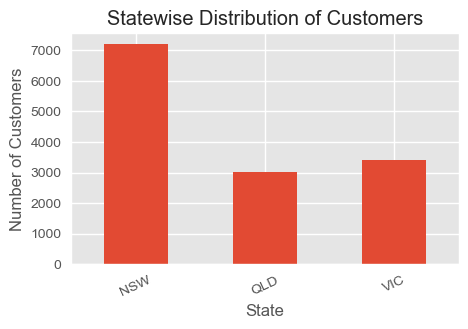

In [216]:
N = 2
ind = np.arange(len(labels))
width = 0.25
labels=['NSW','QLD','VIC']

xvals = df.groupby('state').agg({'customer_id':'count','profit':'sum'})
xvals['customer_id'].plot(kind='bar')

plt.xlabel("State")
plt.ylabel('Number of Customers')
plt.title("Statewise Distribution of Customers")

plt.xticks(ind,labels,rotation=25)
# plt.legend( (bar1, bar2), ('Male', 'Female') )
plt.show()


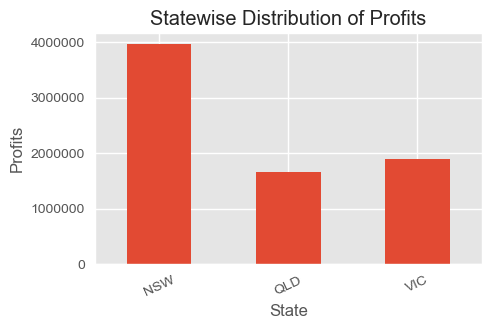

In [217]:
xvals['profit'].plot(kind='bar')

plt.xlabel("State")
plt.ylabel('Profits')
plt.title("Statewise Distribution of Profits")

plt.xticks(ind,labels,rotation=25)
# plt.legend( (bar1, bar2), ('Male', 'Female') )
plt.show()


In [ ]:
df = pd.merge(sheet2, sheet3, left_index=True, right_index=True)
df= df.dropna()


# Merged Dataframes

In [192]:
merge_df = pd.merge(rfmSeg, df, left_index=True, right_index=True)
merge_df.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title', 'index',
       'transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'hist', 'gender',
       'past_3_years_bike_related_purchases', 'job_industry_category',
       'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure', 'age',
       'AgeGroup'],
      dtype='object')

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,index,...,hist,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,AgeGroup
1,7.0,11,3018.09,1,1,3,113,5,silver,3689,...,268.0,Female,93,Health,Mass Customer,N,Yes,11.0,67,Senior Citizens
2,128.0,3,2226.26,4,4,2,442,10,basic,13273,...,225.0,Female,93,Health,Mass Customer,N,Yes,11.0,67,Senior Citizens
3,102.0,7,3290.21,4,3,3,433,10,basic,9526,...,359.0,Female,93,Health,Mass Customer,N,Yes,11.0,67,Senior Citizens
4,195.0,2,220.57,4,4,4,444,12,basic,14517,...,16.0,Female,93,Health,Mass Customer,N,Yes,11.0,67,Senior Citizens
5,16.0,6,2394.94,1,3,2,132,6,silver,14090,...,278.0,Female,93,Health,Mass Customer,N,Yes,11.0,67,Senior Citizens


In [193]:
merge_df.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,index,...,hist,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,AgeGroup
1,7.0,11,3018.09,1,1,3,113,5,silver,3689,...,268.0,Female,93,Health,Mass Customer,N,Yes,11.0,67,Senior Citizens
2,128.0,3,2226.26,4,4,2,442,10,basic,13273,...,225.0,Female,93,Health,Mass Customer,N,Yes,11.0,67,Senior Citizens
3,102.0,7,3290.21,4,3,3,433,10,basic,9526,...,359.0,Female,93,Health,Mass Customer,N,Yes,11.0,67,Senior Citizens
4,195.0,2,220.57,4,4,4,444,12,basic,14517,...,16.0,Female,93,Health,Mass Customer,N,Yes,11.0,67,Senior Citizens
5,16.0,6,2394.94,1,3,2,132,6,silver,14090,...,278.0,Female,93,Health,Mass Customer,N,Yes,11.0,67,Senior Citizens


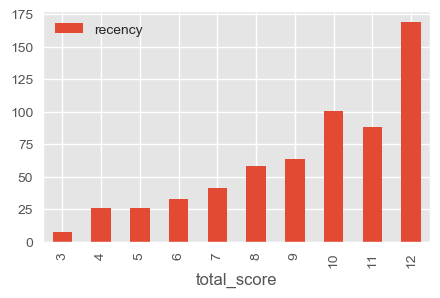

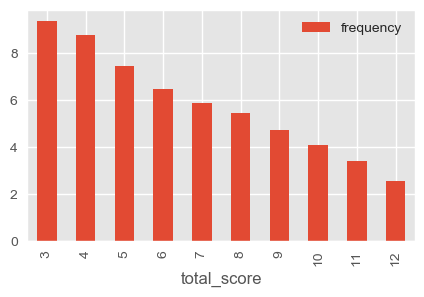

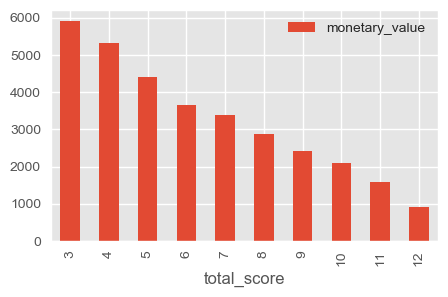

In [194]:
merge_df.groupby('total_score').agg('recency').mean().to_frame().plot(kind='bar')
merge_df.groupby('total_score').agg('frequency').mean().to_frame().plot(kind='bar')
merge_df.groupby('total_score').agg('monetary_value').mean().to_frame().plot(kind='bar')
plt.show()

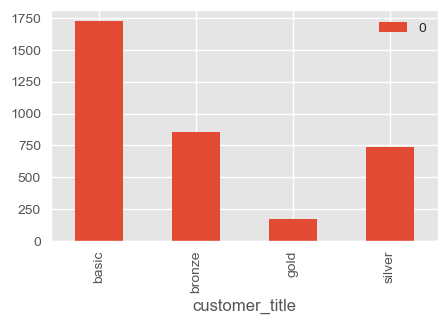

In [195]:
merge_df.groupby('customer_title').size().to_frame().plot(kind='bar')

Text(0.5, 1.0, 'Customer Distributions identified by RFM')

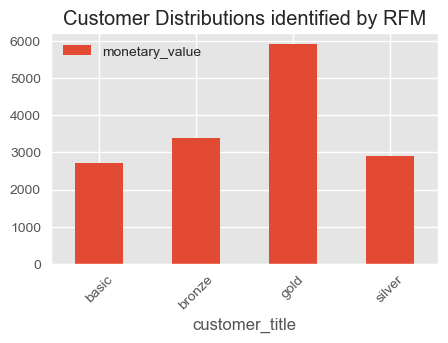

In [226]:
merge_df.groupby('customer_title').agg('monetary_value').mean().to_frame().plot(kind='bar',rot=45)
plt.title('Customer Distributions identified by RFM')

In [197]:
top_1000 = merge_df.sort_values('rfm_class').head(1000)
top_1000

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,index,...,hist,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,AgeGroup
2070,4.0,8,4731.20,1,1,1,111,3,gold,4479,...,154.0,Female,23,Manufacturing,High Net Worth,N,No,20.0,46,Early 40s
1140,6.0,11,6541.05,1,1,1,111,3,gold,9443,...,164.0,Female,47,Health,High Net Worth,N,Yes,22.0,41,30s
2165,0.0,10,6052.93,1,1,1,111,3,gold,11023,...,257.0,Male,93,Manufacturing,High Net Worth,N,Yes,7.0,26,20s
2476,14.0,14,7493.23,1,1,1,111,3,gold,9339,...,190.0,Male,43,Health,Mass Customer,N,Yes,19.0,55,Mid-Life
1942,16.0,8,4675.19,1,1,1,111,3,gold,10807,...,324.0,Female,74,Manufacturing,High Net Worth,N,Yes,6.0,46,Early 40s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,19.0,8,7613.27,2,1,1,211,4,bronze,5387,...,317.0,Male,51,Manufacturing,Mass Customer,N,No,16.0,47,Early 40s
1178,44.0,8,5167.23,2,1,1,211,4,bronze,15921,...,202.0,Female,51,Financial Services,Mass Customer,N,No,4.0,30,30s
2684,38.0,9,6337.40,2,1,1,211,4,bronze,12087,...,200.0,Female,35,Manufacturing,Mass Customer,N,No,15.0,43,30s
2095,20.0,10,6194.30,2,1,1,211,4,bronze,4755,...,182.0,Female,44,Argiculture,Mass Customer,N,No,6.0,29,20s


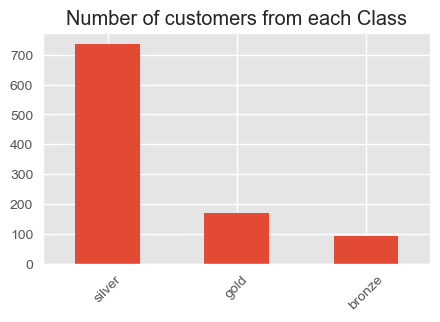

In [231]:
top_1000['customer_title'].value_counts().plot(kind='bar',rot=45,title = 'Number of customers from each Class')

In [232]:
top_1000.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title', 'index',
       'transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'hist', 'gender',
       'past_3_years_bike_related_purchases', 'job_industry_category',
       'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure', 'age',
       'AgeGroup'],
      dtype='object')